Problem : 2
---------------
Given my recorded arrival time-stamps (workspace folder),
estimate the probability of my being present in the institute at
T = t time instance. Assume that if I have arrived, I will be
available in my office, when should you come to my office to meet
me to ensure that we meet with 0.9 probability.

Suppose you are able to observe the light in my office. Assume
that if I am in my office the probability that the light is on is 0.90
and if I am not available in my office the probability that the light
is on is 0.01. Derive the conditional probability of me being
available in my office given that the light in my office is on (off).

In [2]:
at<-read.csv('arrival_time.csv')

In [3]:
head(at)

,X,x
,<int>,<dbl>
1,1,9.085415
2,2,9.003920
3,3,8.896530
4,4,9.198360
5,5,9.157749
6,6,9.117046


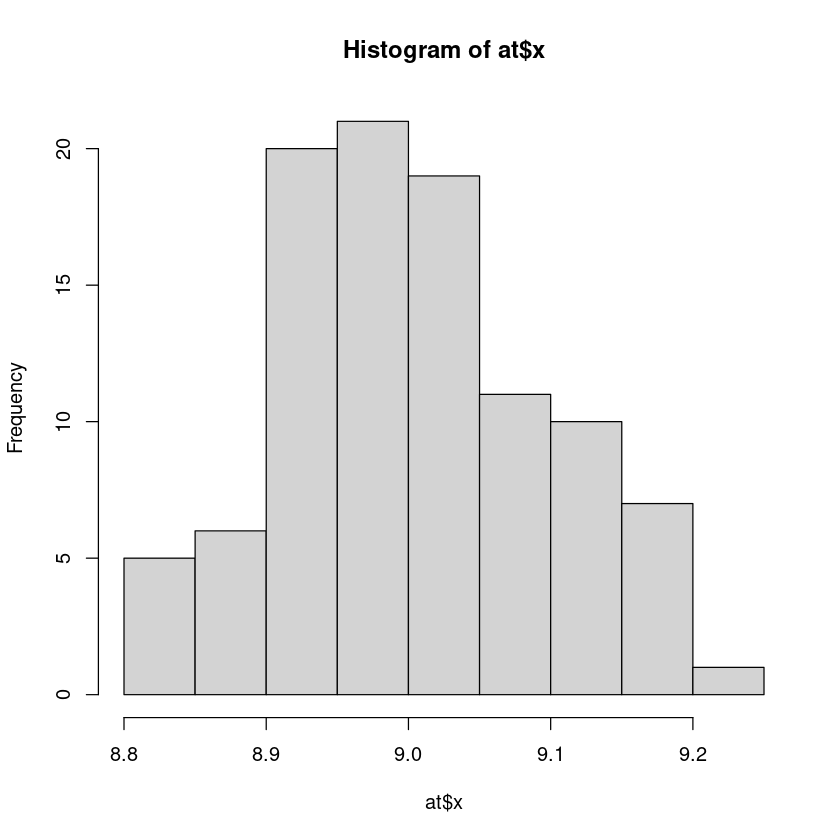

In [4]:
hist(at$x)

In [5]:
?dnorm

Normal {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
mean,vector of means.
sd,vector of standard deviations.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x] otherwise, P[X > x]."


In [6]:
summary(at)

       X                x        
 Min.   :  1.00   Min.   :8.827  
 1st Qu.: 25.75   1st Qu.:8.943  
 Median : 50.50   Median :8.996  
 Mean   : 50.50   Mean   :9.005  
 3rd Qu.: 75.25   3rd Qu.:9.065  
 Max.   :100.00   Max.   :9.211  

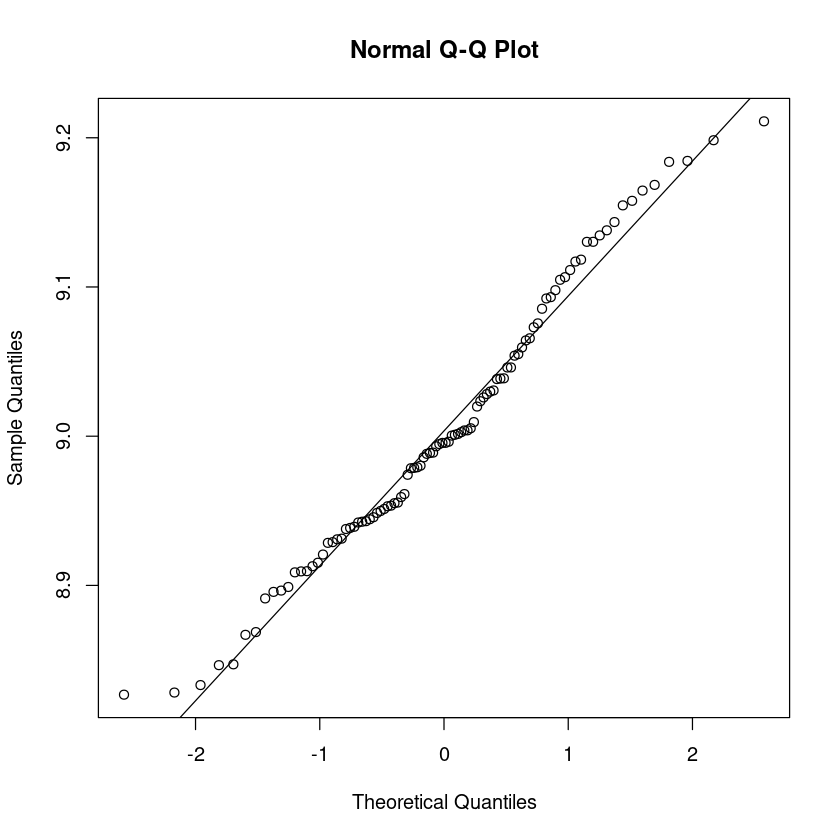

In [7]:
qqnorm(at$x)
qqline(at$x)

In [8]:
library(fitdistrplus)

Loading required package: MASS

Loading required package: survival



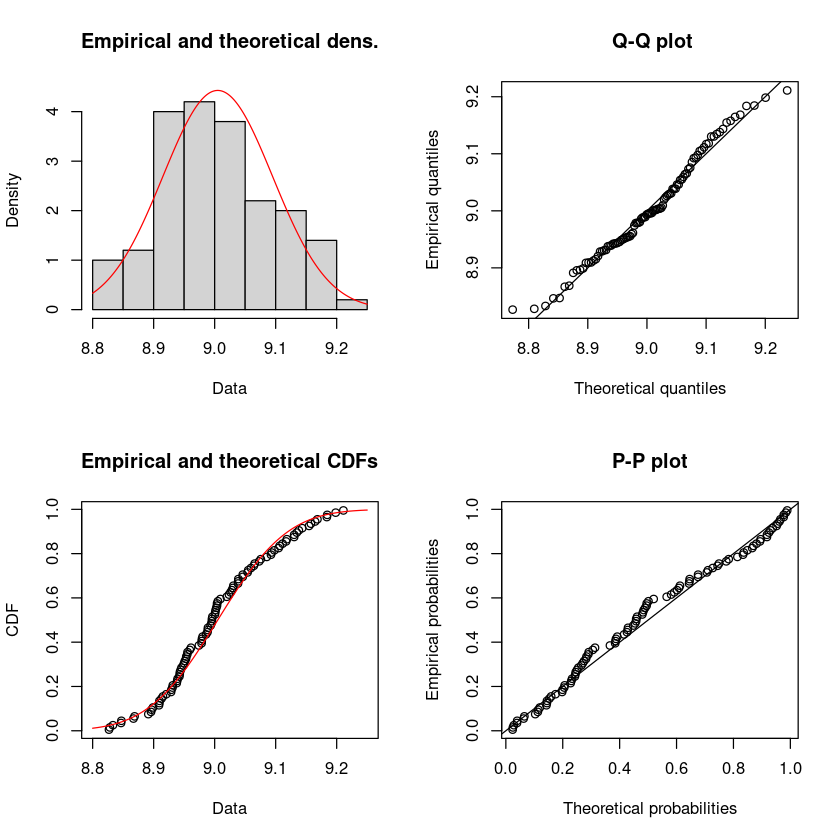

In [9]:
fat <- fitdist(at$x,"norm")
plot(fat)

In [10]:
summary(fat)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
       estimate  Std. Error
mean 9.00502245 0.009008286
sd   0.09008286 0.006366288
Loglikelihood:  98.80868   AIC:  -193.6174   BIC:  -188.407 
Correlation matrix:
             mean           sd
mean 1.000000e+00 1.018729e-13
sd   1.018729e-13 1.000000e+00


In [12]:
fat$estimate[1]

mean 
9.005022

In [21]:
t <- seq(7,11,0.01);
pt<-pnorm(t,fat$estimate[1],fat$estimate[2])

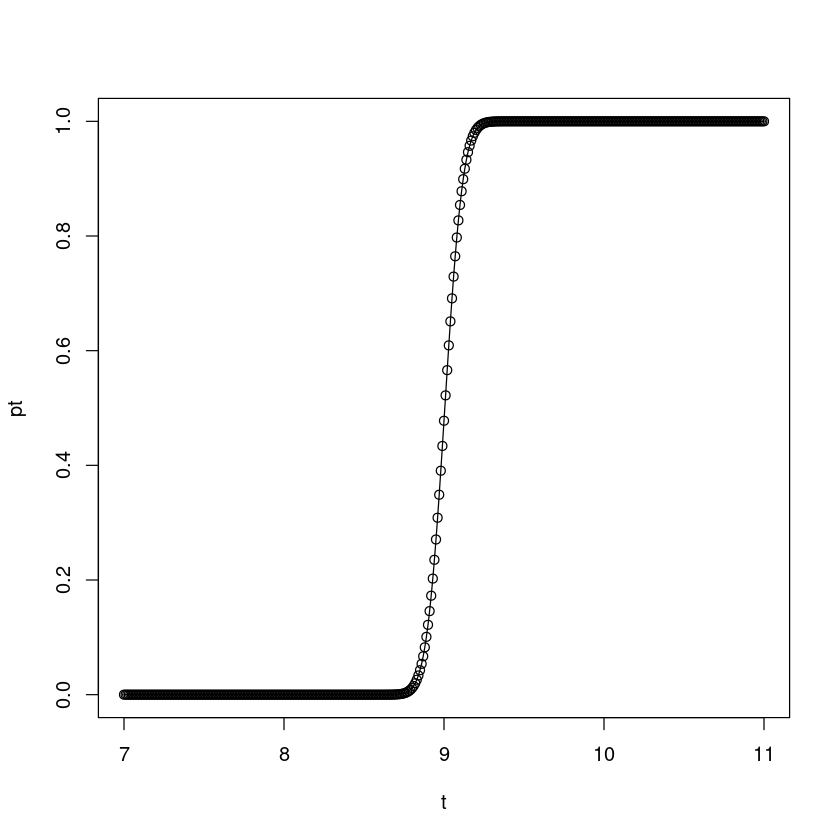

In [22]:
plot(t,pt); lines(t,pt);

P(on|T<=t)=0.9
P(on|T>t)=0.01

P(T<=t | on) = P(on | T<=t) P(T<=t) / P(on)
P(on) = P(on|T<=t)P(T<=t) + P(on|T>t)(1-P(T<=t))
P(on) = 0.9 * P(T<=t) + 0.01 * (1-P(T<=t))
P(on) = 0.01 + (0.9-0.01) P(T<=t)
P(on) = 0.01 + 0.89 P(T<=t)

P(T<=t | on) = 0.9 * P(T<=t) / (0.01+0.89*P(T<=t))


In [23]:
pct <- 0.9*pt/(0.01+0.89*pt)

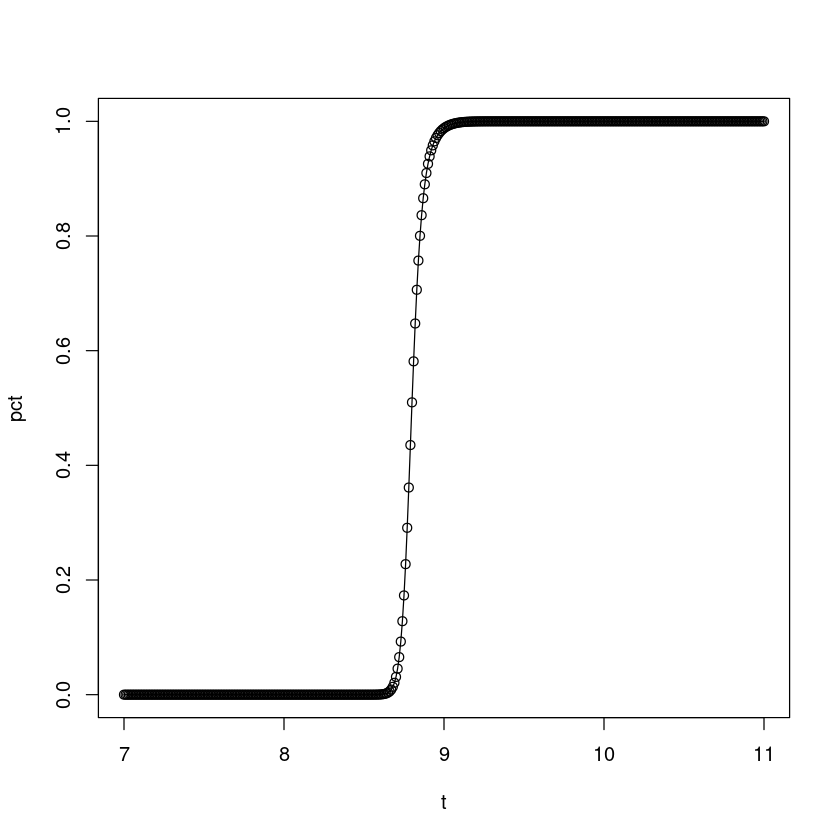

In [24]:
plot(t,pct); lines(t,pct);